<h1 align="center"> Data Summarization and Visualization </h1>
<h3 align="center"> IST 5520: Data Science and Machine Learning with Python </h3>
<h3 align="center"> By: Langtao Chen </h3>
<h3 align="center"> Last Update: 10/4/2022 </h3>

In [1]:
# Import modules
import pandas as pd
import numpy as np

# 1. Tabular Methods

We use the Toyota Corolla dataset to show how to use tabular methods in Pandas.

In [2]:
dat = pd.read_csv("../Data/ToyotaCorolla.csv")
dat.head()

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,13500,23,46986,Diesel,90,1,0,2000,3,1165
1,13750,23,72937,Diesel,90,1,0,2000,3,1165
2,13950,24,41711,Diesel,90,1,0,2000,3,1165
3,14950,26,48000,Diesel,90,0,0,2000,3,1165
4,13750,30,38500,Diesel,90,0,0,2000,3,1170


In [3]:
dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age        1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   FuelType   1436 non-null   object
 4   HP         1436 non-null   int64 
 5   MetColor   1436 non-null   int64 
 6   Automatic  1436 non-null   int64 
 7   CC         1436 non-null   int64 
 8   Doors      1436 non-null   int64 
 9   Weight     1436 non-null   int64 
dtypes: int64(9), object(1)
memory usage: 112.3+ KB


In [4]:
dat['CC'].unique()

array([2000, 1800, 1900, 1600, 1400, 1598, 1995, 1398, 1300, 1587, 1975,
       1332], dtype=int64)

## 1.1 Frequency Table

In [5]:
pd.crosstab(index=dat['CC'],columns="count")

col_0,count
CC,
1300,248
1332,2
1398,2
1400,164
1587,4
1598,4
1600,846
1800,14
1900,30


## 1.2 Relative Frequency Table

In [6]:
pd.crosstab(index=dat['CC'],columns="Percent").sum()

col_0
Percent    1436
dtype: int64

In [7]:
pd.crosstab(index=dat['CC'],columns="Percent")/pd.crosstab(index=dat['CC'],columns="Percent").sum()

col_0,Percent
CC,
1300,0.172702
1332,0.001393
1398,0.001393
1400,0.114206
1587,0.002786
1598,0.002786
1600,0.589136
1800,0.009749
1900,0.020891


## 1.3 Two-way Frequency Table (a.k.a. Contingency Table)

In [8]:
pd.crosstab(dat['FuelType'], dat['CC'], margins=False)

CC,1300,1332,1398,1400,1587,1598,1600,1800,1900,1975,1995,2000
FuelType,,,,,,,,,,,,
CNG,0,0,0,0,0,1,16,0,0,0,0,0
Diesel,0,0,0,0,0,0,0,3,30,1,2,119
Petrol,248,2,2,164,4,3,830,11,0,0,0,0


## 2. Explore Toy Datasets in sklearn.datasets Package

The sklearn.datasets package embeds some small toy datasets. Now let's explore these toy datasets.

In [9]:
# Load the datasets package
from sklearn import datasets

In this demo, we'll load the boston house price dataset. For other datasets, you can refer to: https://scikit-learn.org/stable/datasets

In [10]:
# Load the boston house-price dataset
boston = datasets.load_boston()
type(boston)

C:\Users\chenla\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include th

sklearn.utils._bunch.Bunch

In [11]:
boston.DESCR

".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000

In [12]:
# Print the description of the dataset
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [13]:
boston.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [14]:
# Print the data
print(boston.data)

[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]


In [15]:
# Print the shape of the data
print(boston.data.shape)

(506, 13)


In [16]:
# Print the names of the features
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [17]:
# Print the values of the response variable
print(boston.target)

[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  50.  50.  22.7 25.  50.  23.8
 23.8 22.3 17.4 19.1 23.1 23.6 22.6 29.4 23.2 24.6 29.9 37.2 39.8 36.2
 37.9 32.5 26.4 29.6 50.  32.  29.8 34.9 37.  30.5 36.4 31.1 29.1 50.
 33.3 3

In [18]:
# Print the shape of the response variable
print(boston.target.shape)

(506,)


## 3. Convert scikit-learn Dataset to pandas DataFrame

Since we prefer the data wrangling capability of the pandas package, now let's  convert the toy dataset into pandas DataFrame.

In [19]:
boston_df = pd.DataFrame(boston.data, columns=boston.feature_names)
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [20]:
boston_df['Target'] = boston.target

In [21]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Target   506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [22]:
# Show 10 samples
boston_df.sample(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
156,2.44668,0.0,19.58,0.0,0.871,5.272,94.0,1.7364,5.0,403.0,14.7,88.63,16.14,13.1
124,0.09849,0.0,25.65,0.0,0.581,5.879,95.8,2.0063,2.0,188.0,19.1,379.38,17.58,18.8
293,0.08265,0.0,13.92,0.0,0.437,6.127,18.4,5.5027,4.0,289.0,16.0,396.90,8.58,23.9
420,11.08740,0.0,18.10,0.0,0.718,6.411,100.0,1.8589,24.0,666.0,20.2,318.75,15.02,16.7
58,0.15445,25.0,5.13,0.0,0.453,6.145,29.2,7.8148,8.0,284.0,19.7,390.68,6.86,23.3
123,0.15038,0.0,25.65,0.0,0.581,5.856,97.0,1.9444,2.0,188.0,19.1,370.31,25.41,17.3
20,1.25179,0.0,8.14,0.0,0.538,5.570,98.1,3.7979,4.0,307.0,21.0,376.57,21.02,13.6
486,5.69175,0.0,18.10,0.0,0.583,6.114,79.8,3.5459,24.0,666.0,20.2,392.68,14.98,19.1
276,0.10469,40.0,6.41,1.0,0.447,7.267,49.0,4.7872,4.0,254.0,17.6,389.25,6.05,33.2
455,4.75237,0.0,18.10,0.0,0.713,6.525,86.5,2.4358,24.0,666.0,20.2,50.92,18.13,14.1


In [23]:
# Get the descriptive summary
boston_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


We also import another dataset, iris, for demo purpose here.

In [24]:
iris = datasets.load_iris()
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [25]:
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df['Class']= iris.target
iris_df.sample(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Class
113,5.7,2.5,5.0,2.0,2
10,5.4,3.7,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
82,5.8,2.7,3.9,1.2,1
1,4.9,3.0,1.4,0.2,0
3,4.6,3.1,1.5,0.2,0
124,6.7,3.3,5.7,2.1,2
83,6.0,2.7,5.1,1.6,1
127,6.1,3.0,4.9,1.8,2
67,5.8,2.7,4.1,1.0,1


In [26]:
# Get the descriptive summary
iris_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
sepal length (cm),150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal width (cm),150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal length (cm),150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal width (cm),150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5
Class,150.0,1.000000,0.819232,0.0,0.0,1.00,2.0,2.0


## 4. Visualize Data

Matplotlib (http://matplotlib.org) is a Python 2D plotting library which produces publication quality figures in a variety of hardcopy formats and interactive environments across platforms. Matplotlib can be used in Python scripts, the Python and IPython shell, the jupyter notebook, web application servers, and four graphical user interface toolkits.

Matplotlib tries to make easy things easy and hard things possible. You can generate plots, histograms, power spectra, bar charts, errorcharts, scatterplots, etc., with just a few lines of code.

For simple plotting the **pyplot** module provides a MATLAB-like interface, particularly when combined with IPython. For the power user, you have full control of line styles, font properties, axes properties, etc, via an object oriented interface or via a set of functions familiar to MATLAB users.

For a summary of the matplotlib.pyplot module, refer to: http://matplotlib.org/api/pyplot_summary.html

The pandas module also supports various basic plots. The plot method on Series and DataFrame is just a simple wrapper around plt.plot().

Seaborn is a Python visualization library based on matplotlib. It provides a high-level interface for drawing attractive statistical graphics.

In [27]:
# Import libraries
import matplotlib.pyplot as plt

import seaborn as sns

### 4.1 Bar Chart

In this example, we'll draw a bar chart to show the average sepal length for different types of iris flow. Before we draw the bar chart, we need to prepare a dataset that represents the data we want to plot.

In [28]:
# Generate an aggregated DataFrame to represent the mean of sepal length
mean_sepal_len_by_class = iris_df[['Class','sepal length (cm)']].groupby('Class').mean()

mean_sepal_len_by_class

,sepal length (cm)
Class,
0,5.006
1,5.936
2,6.588


In [29]:
# Recode the index
mean_sepal_len_by_class.index = ['Setosa','Versicolour','Virginica']

# Show the aggregated DataFrame
mean_sepal_len_by_class

,sepal length (cm)
Setosa,5.006
Versicolour,5.936
Virginica,6.588


<AxesSubplot: >

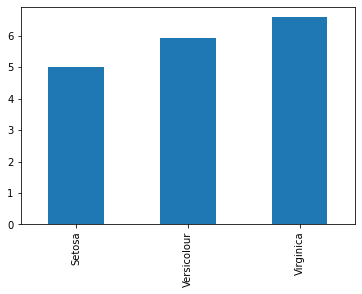

In [30]:
mean_sepal_len_by_class.plot(kind='bar', legend = False)

(array([0, 1, 2]),
 [Text(0, 0, 'Setosa'), Text(1, 0, 'Versicolour'), Text(2, 0, 'Virginica')])

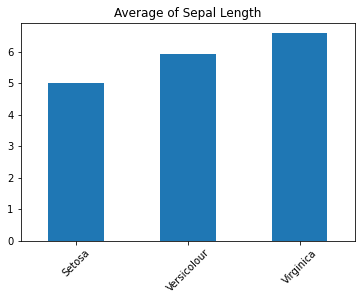

In [31]:
mean_sepal_len_by_class.plot(kind='bar', legend = False)
plt.title('Average of Sepal Length')
plt.xticks(rotation=45)

In [32]:
# Calculate standard error
std1 = iris_df[['Class','sepal length (cm)']].groupby('Class').std()

# Recode the index. The std1 must have the same index as the mean data, or else the barchar with error bars would be wrong.
std1.index = ['Setosa','Versicolour','Virginica']

std1

,sepal length (cm)
Setosa,0.352490
Versicolour,0.516171
Virginica,0.635880


Let's further customize the barchart by:

1. showing the standard error bars; and
2. using alpha channel.

Alpha channel is often used to soften colors in the plot (transparency). By using the alpha channel, we can see multiple shaded regions that overlap.

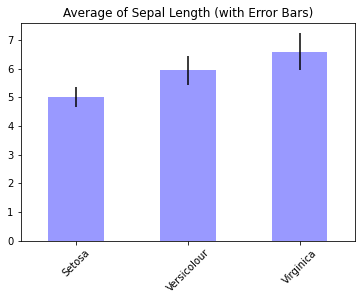

In [33]:
mean_sepal_len_by_class.plot(kind='bar', color='b', 
                             yerr = std1, alpha=0.4,
                             align='center',legend = False)
plt.title('Average of Sepal Length (with Error Bars)')
plt.xticks(rotation=45)
plt.show()

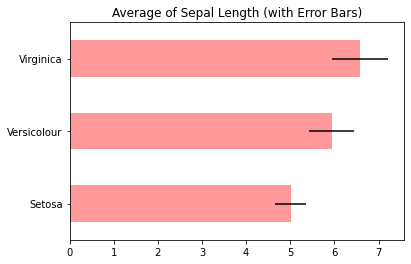

In [34]:
mean_sepal_len_by_class.plot(kind='barh', color='r', 
                             xerr = std1, alpha=0.4,
                             align='center',legend = False)
plt.title('Average of Sepal Length (with Error Bars)')
plt.savefig("iris_bar_mean_sepal_len.png",bbox_inches='tight')
plt.show()

Note:

It cannot be directly seen from the standard error bars whether the difference between two groups are statistically significant. For example, the sepal length of versicolour has a standard error bar that seems to not overlap with the standard error bar of the sepal length of setosa. However, we are not sure whether the difference of sepal length between versicolour and setosa are statistically different.

To test the significance of difference, you need to formally run ANOVA or t-test. Usually, 95% confidence interval (CI) of a mean is around twice wide as the standard error bar.

Now, we can draw a bar chart with more than two variables.

In [35]:
# Generate an aggregated DataFrame to represent the mean of sepal length and the mean of petal length
mean_sepal_petal_by_class = iris_df[['Class','sepal length (cm)','petal length (cm)']].groupby('Class').mean()

# Recode the index
mean_sepal_petal_by_class.index = ['Setosa','Versicolour','Virginica']

# Show the aggregated DataFrame
mean_sepal_petal_by_class

,sepal length (cm),petal length (cm)
Setosa,5.006,1.462
Versicolour,5.936,4.260
Virginica,6.588,5.552


Draw two categories tegother.

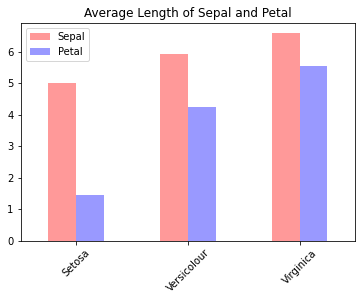

In [36]:
mean_sepal_petal_by_class.plot.bar(color=['red','blue'],alpha=0.4)
plt.legend(('Sepal','Petal'),loc='best')
plt.title('Average Length of Sepal and Petal')
plt.xticks(rotation=45)
plt.show()

Draw two categories stacked tegother.

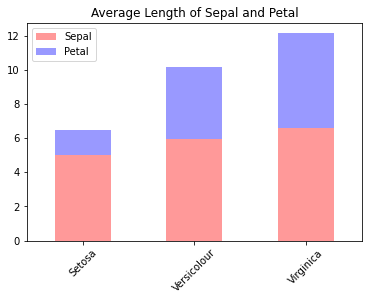

In [37]:
mean_sepal_petal_by_class.plot(kind='bar',color=['red','blue'],alpha=0.4,stacked=True)
plt.legend(('Sepal','Petal'),loc='best')
plt.title('Average Length of Sepal and Petal')
plt.xticks(rotation=45)
plt.show()

### 4.2 Pie Chart

In [38]:
mean_sepal_len_by_class

,sepal length (cm)
Setosa,5.006
Versicolour,5.936
Virginica,6.588


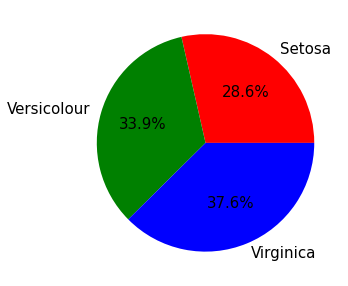

In [39]:
mean_sepal_len_by_class['sepal length (cm)'].plot(kind='pie',colors=['r','g','b'],
                                                  autopct='%.1f%%',
                                                  fontsize=15,                                                  
                                                  figsize=(5,5))
plt.ylabel('')
plt.show()

Only show percentage numbers without "%".

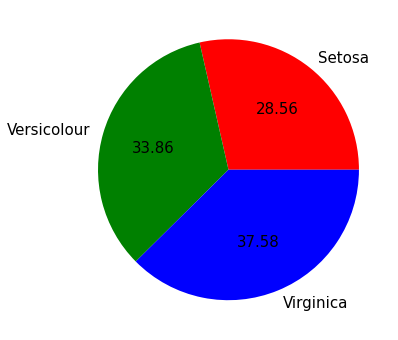

In [40]:
mean_sepal_len_by_class['sepal length (cm)'].plot.pie(colors=['r','g','b'],
                                                     autopct='%.2f',
                                                     fontsize=15,
                                                     figsize=(6,6))
plt.ylabel('')
plt.show()

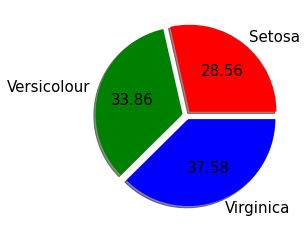

In [41]:
mean_sepal_len_by_class['sepal length (cm)'].plot(kind='pie',
                                                  colors=['r','g','b'],
                                                  autopct='%.2f',
                                                  fontsize=15,
                                                  figsize=(6,4),
                                                  explode=(0.05, 0.05, 0.05),
                                                  shadow=True)
plt.ylabel('')
plt.show()

### 4.3 Box Plot

Boxplot of a single variable.

<AxesSubplot: >

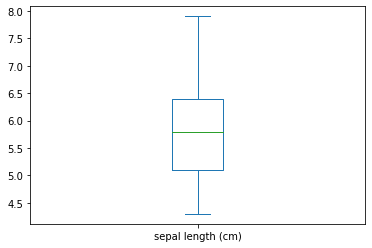

In [42]:
iris_df['sepal length (cm)'].plot.box()

Boxplot of multiple variables.

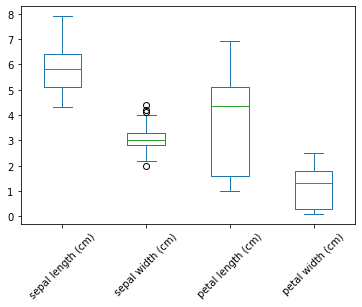

In [43]:
plot1 = iris_df[['sepal length (cm)',
                 'sepal width (cm)',
                 'petal length (cm)',
                 'petal width (cm)']].plot.box()
plt.xticks(rotation=45)
plt.savefig('boxplot.png',bbox_inches='tight', dpi=200)

<AxesSubplot: title={'center': 'sepal length (cm)'}, xlabel='[Class]'>

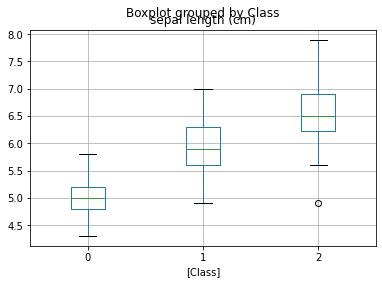

In [44]:
iris_df.boxplot(column=['sepal length (cm)'], by=['Class'])

<AxesSubplot: xlabel='Class', ylabel='sepal length (cm)'>

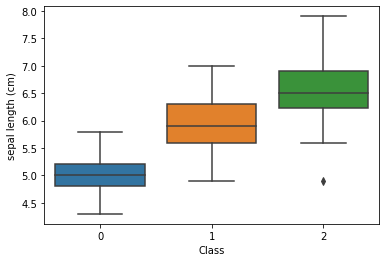

In [45]:
# Use seaborn
sns.boxplot(x='Class', y='sepal length (cm)', data=iris_df)

### 4.4 Detect Outlier According to Boxplot Rule

From the above boxplot, we notice that the 'sepal width (cm)' variable has some outliers. According to the boxplot rule, outliers are data points that are out of the range [Q1 – 1.5IQR, Q3 + 1.5IQR]. Now, let's use the boxplot rule to detect outliers from the dataset.


In [46]:
# Calculate the first quantile
first_quantile = iris_df['sepal width (cm)'].quantile(0.25)

# Calculate the first quantile
third_quantile = iris_df['sepal width (cm)'].quantile(0.75)

# Calculate the interquantile range (IQR)
IQR = third_quantile - first_quantile

In [47]:
# Outliers below the boxplot
iris_df[iris_df['sepal width (cm)']<first_quantile-1.5*IQR]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Class
60,5.0,2.0,3.5,1.0,1


In [48]:
# Outliers above the boxplot
iris_df[iris_df['sepal width (cm)']>third_quantile+1.5*IQR]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Class
15,5.7,4.4,1.5,0.4,0
32,5.2,4.1,1.5,0.1,0
33,5.5,4.2,1.4,0.2,0


### 4.5 Histogram and Density Plot 

Draw the histogram for price.

Text(0.5, 1.0, 'Histgram of Boston House Price')

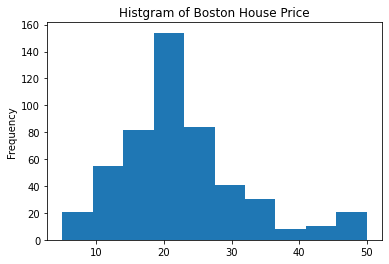

In [49]:
boston_df['Target'].plot(kind='hist')
plt.title('Histgram of Boston House Price')

Draw the Kernel Density Estimation plot for price.

Text(0.5, 1.0, 'Density of Boston House Price')

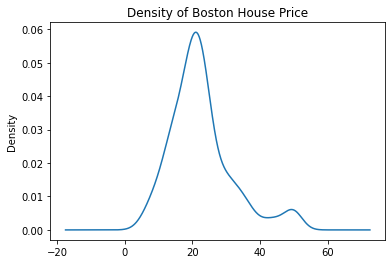

In [50]:
boston_df['Target'].plot(kind='kde')
plt.title('Density of Boston House Price')

We can also use the displot() method in the seaborn package to draw a histogram and fit a kernel density estimate (KDE)

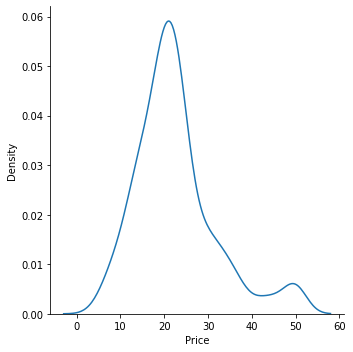

In [51]:
ax = sns.displot(boston_df['Target'],kind='kde')
ax.set_titles('Histgram of Boston House Price')
ax.set_xlabels('Price')

Density plot with multiple variables.

<AxesSubplot: ylabel='Density'>

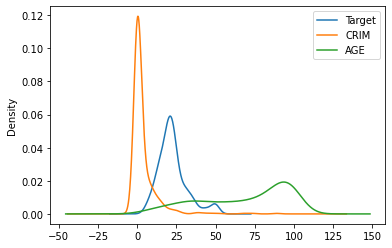

In [52]:
boston_df[['Target','CRIM','AGE']].plot(kind='kde')

### 4.6 Scatter Plot

Let's use a feature selection method to select an explanatory variable that best explains house price and then draw scatter plots to visualize the relationship between the explanatory variable and house price.

In [53]:
# Import feature selection and linear regression packages
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression

In [54]:
selector = SelectKBest(f_regression, k=1)
selector.fit(boston_df.loc[:,'CRIM':'LSTAT'],boston_df['Target'])
selector.get_support()

array([False, False, False, False, False, False, False, False, False,
       False, False, False,  True])

It shows that the last independent variable (LSTAT) is the best one to explain the variation in the reponse variable. We can further analyze the correlation between predictors and response variables. As shown below, LSTAT has the highest correlation (-0.737663) with the response variable among all predictors. So it makes sense to choose LSTAT as the best predictor. 

In [55]:
boston_df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


Now, let's draw a scatter plot between Target and LSTAT.

Text(0, 0.5, 'house price')

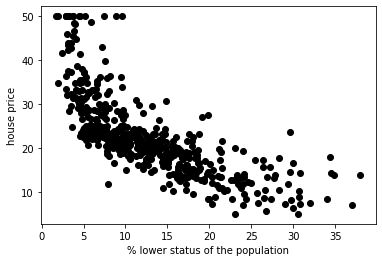

In [56]:
# Use matplotlib to draw scatterplot
plt.scatter(boston_df['LSTAT'], boston_df['Target'], color='black')
plt.xlabel('% lower status of the population')
plt.ylabel('house price')

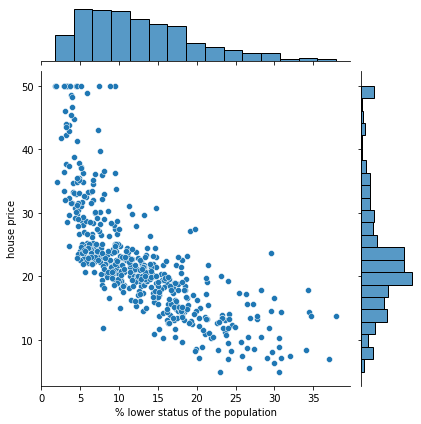

In [57]:
# Use seaborn to draw scatterplot
ax = sns.jointplot(x="LSTAT", y="Target", data=boston_df[['LSTAT','Target']])
ax.set_axis_labels('% lower status of the population','house price')

We can also draw scatter plot by a group. Here we'll use 'CHAS' to group the scatter plot.

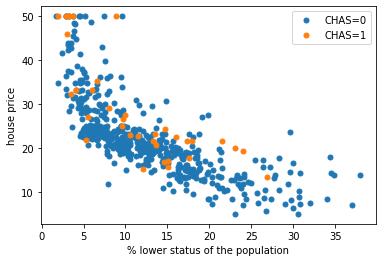

In [58]:
# Generate grouped data first
grouped = boston_df.groupby('CHAS')

# Then draw the plot by group
fig, ax = plt.subplots()
for name, group in grouped:
    ax.plot(group.LSTAT, group.Target, marker='o', linestyle='', ms=5, label=name)
ax.legend(['CHAS=0','CHAS=1'])
plt.xlabel('% lower status of the population')
plt.ylabel('house price')
plt.show()

From the above plot, the curve linear relationship between LSTAT and house price maintains similar across the two groups (CHAS = 0 and CHAS = 1).

Now, let's add a regression line to the scatterplot to better show the relationship.

In [59]:
regressor = LinearRegression()

In [60]:
regressor.fit(boston_df['LSTAT'].values.reshape(-1,1), boston_df['Target'])

LinearRegression()

Text(0, 0.5, 'house price')

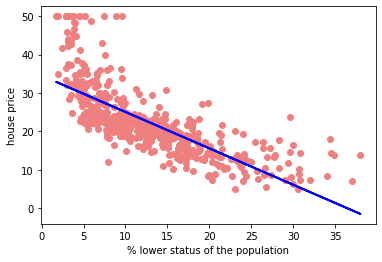

In [61]:
plt.scatter(boston_df['LSTAT'], boston_df['Target'], color='lightcoral')
plt.plot(boston_df['LSTAT'], regressor.predict(boston_df['LSTAT'].values.reshape(-1,1)), color='blue',linewidth=2)
plt.xlabel('% lower status of the population')
plt.ylabel('house price')

If we use the seaborn module, we don't need to conduct the regression analysis. Simply specifying the kind parameter as "reg" will add the regression line.

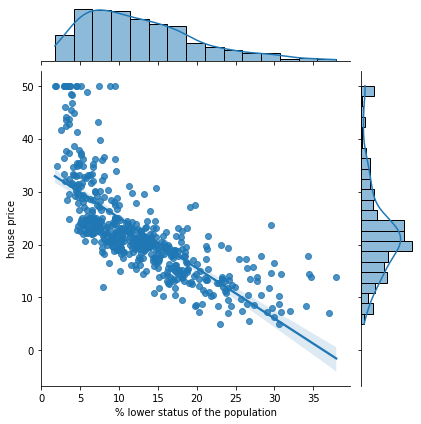

In [62]:
# Use seaborn to draw scatterplot
ax = sns.jointplot(x="LSTAT", y="Target", data=boston_df[['LSTAT','Target']],kind='reg')
ax.set_axis_labels('% lower status of the population','house price')

### 4.7 Hexagonal Binning Plot

Compared with a scatter plot, a hexagonal binning plot not only shows the relationship pattern between two variables, but it also helps to effectively visualize the point densities.

Text(0, 0.5, 'Price')

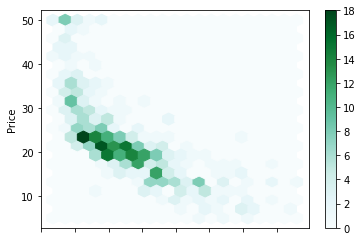

In [63]:
boston_df.plot(kind='hexbin', x='LSTAT', y='Target',gridsize=20)
plt.ylabel('Price')

Alternatively, we can draw a scatterplot, then add a joint density estimate to visualize the pair-wise relationship as well as point densities.

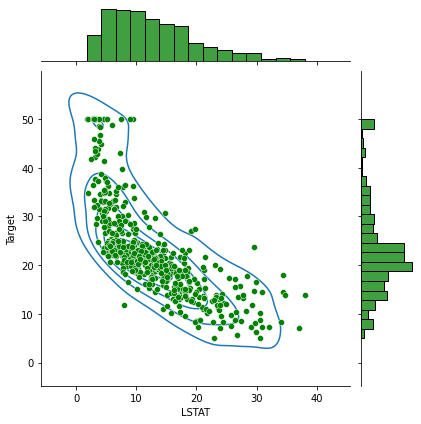

In [64]:
# Draw a scatterplot, then add a joint density estimate
ax = sns.jointplot(x="LSTAT", y="Target", data=boston_df[['LSTAT','Target']],color='g')
ax.plot_joint(sns.kdeplot, zorder=0, n_levels=6)

### 4.8 Scatter Plot Matrix

In [65]:
colors = list()
palette = {0: "red", 1: "green", 2: "blue"}

# Convert each numeric class into a color string
for c in np.nditer(iris.target): colors.append(palette[int(c)])

In [66]:
# Print the colors list
print(colors)

['red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue',

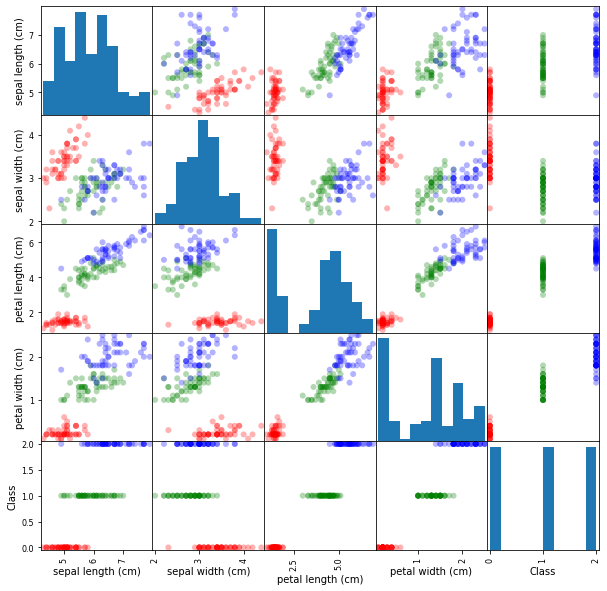

In [67]:
scatterplot = pd.plotting.scatter_matrix(iris_df,
                                         alpha=0.3,
                                         figsize=(10, 10),
                                         diagonal='hist',
                                         c=colors,
                                         marker='o',
                                         grid=True)

Now, let's show the kernel density estimation plot on the diagonal.

If you want to save a figure as a file, you can easily do this by calling plt.savefig() method.

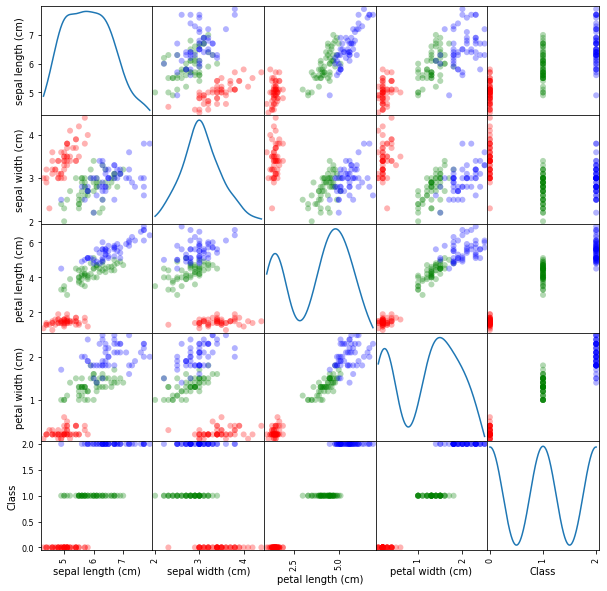

In [68]:
scatterplot = pd.plotting.scatter_matrix(iris_df,                                      
                                         alpha=0.3,
                                         figsize=(10, 10),
                                         diagonal='kde',
                                         c=colors,
                                         marker='o',
                                         grid=True)
# Save the current figure
plt.savefig('iris_scatterplot_matrix.png', bbox_inches='tight')